# Pymaceuticals Inc.
---

### Analysis

This code looks at data to analyze the effects of several drug regimens on the volume of tumors in a set of mice, in order to evaluate the effectiveness of Capomulin against other treatment regimens.

A summary of some key findings are as follows:
- Capomulin appears to be effective at reducing the volume of tumors. In one example mouse, the tumor volume (in cubic mm) was reduced from 45 mm3 to approximately 41 mm3 over 45 days.
- Similarly, Capomulin demonstrated a mean tumor volume (over all mice, over all timepoints) of 40.7 mm3 and similar median tumor volume, which was much lower than many of the other drugs tested.
- Capomulin performed approximately as well as Ramicane, with a similar spread of results and a similar mean tumor volume after 45 days, and significantly smaller than Infubinol and Ceftamin.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
results_complete = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
results_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Checking the number of mice.
results_complete.nunique()["Mouse ID"]

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


results_complete_duplicates = results_complete[results_complete.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]
results_complete_duplicates["Mouse ID"]

#This is for the code cell below, but I stumbled upon it here
#results_complete.loc[results_complete.duplicated(subset = ["Mouse ID", "Timepoint"], keep=False),:]
    #Taken from https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f

107     g989
137     g989
329     g989
360     g989
620     g989
681     g989
815     g989
869     g989
950     g989
1111    g989
Name: Mouse ID, dtype: object

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 

#I worked on this with the help of a tutor. It's probably a little redudant since
    #results_complete_duplicates_full = results_complete.loc[results_complete["Mouse ID"] == "g989",:]
#would have worked but I wanted to write a code that could be used again hypothetically 
#on a different dataset with multiple duplicates

#This code creates an empty data frame with the same column headers, and then runs through every unique
#item in results_complete_duplicates and then creates a dataframe of just those rows (called "results_complete_duplicates_full)
#and then that concats each time the loop is run into "results_complete_duplicates_full_df"
#(I know my dataframe naming got out of hand here, but I'll leave it since I don't think I'll use these dataframes elsewhere)
results_complete_duplicates["Mouse ID"].unique()

results_complete_duplicates_full_df = pd.DataFrame({
    "Mouse ID":[],
    "Timepoint":[],
    "Tumor Volume (mm3)":[],
    "Metastatic Sites":[],
    "Drug Regimen":[],
    "Sex":[],
    "Age_months":[],
    "Weight (g)":[]
})

for i in results_complete_duplicates["Mouse ID"].unique():
    results_complete_duplicates_full = results_complete.loc[results_complete["Mouse ID"] == i,:]
    results_complete_duplicates_full_df = pd.concat([results_complete_duplicates_full_df, results_complete_duplicates_full], ignore_index = True)


results_complete_duplicates_full_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0.0,45.000000,0.0,Propriva,Female,21.0,26.0
1,g989,0.0,45.000000,0.0,Propriva,Female,21.0,26.0
2,g989,5.0,48.786801,0.0,Propriva,Female,21.0,26.0
3,g989,5.0,47.570392,0.0,Propriva,Female,21.0,26.0
4,g989,10.0,51.745156,0.0,Propriva,Female,21.0,26.0
5,g989,10.0,49.880528,0.0,Propriva,Female,21.0,26.0
6,g989,15.0,51.325852,1.0,Propriva,Female,21.0,26.0
7,g989,15.0,53.442020,0.0,Propriva,Female,21.0,26.0
8,g989,20.0,55.326122,1.0,Propriva,Female,21.0,26.0
9,g989,20.0,54.657650,1.0,Propriva,Female,21.0,26.0


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results_complete = results_complete.drop(results_complete[results_complete["Mouse ID"]=="g989"].index).reset_index(drop=True)

clean_results_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [26]:
# Checking the number of mice in the clean DataFrame.
clean_results_complete.nunique()["Mouse ID"]

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_results = clean_results_complete.groupby(["Drug Regimen"])
mean_tumor_volume = grouped_results.mean()["Tumor Volume (mm3)"]
median_tumor_volume = grouped_results.median()["Tumor Volume (mm3)"]
variance_tumor_volume = grouped_results.var()["Tumor Volume (mm3)"]
standard_deviation_tumor_volume = grouped_results.std()["Tumor Volume (mm3)"]
standard_error_tumor_volume = grouped_results.sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.

summary_results = pd.DataFrame({
    "Mean Tumor Volume (mm3)" : mean_tumor_volume,
    "Median Tumor Volume (mm3)" : median_tumor_volume,
    "Tumor Volume Variance" : variance_tumor_volume,
    "Tumor Volume Std. Dev." : standard_deviation_tumor_volume,
   "Tumor Volume Std. Err." : standard_error_tumor_volume  
})

summary_results


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_results_agg = clean_results_complete.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

summary_results_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

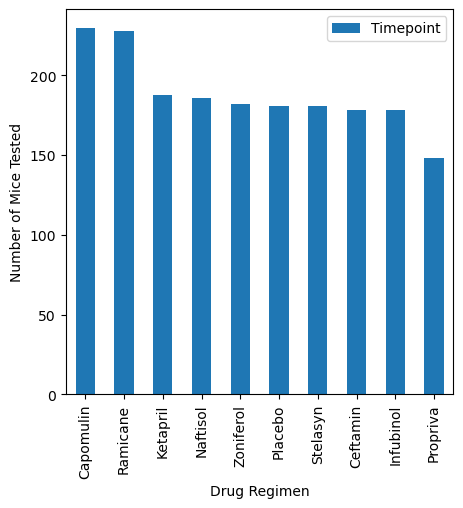

<Figure size 640x480 with 0 Axes>

In [39]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Use the grouped_results dataframe from earlier, but count the number of timepoints under each drug regimen
drug_and_timepoints = grouped_results[["Timepoint"]].count()

#sort them, just so the order of the graph goes from largest to smallest
drug_and_timepoints = drug_and_timepoints.sort_values(by = "Timepoint", ascending = False)

#Plot the dataframe
drug_and_timepoints.plot(kind="bar", figsize=(5,5), ylabel = "Number of Mice Tested")
plt.show()
plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

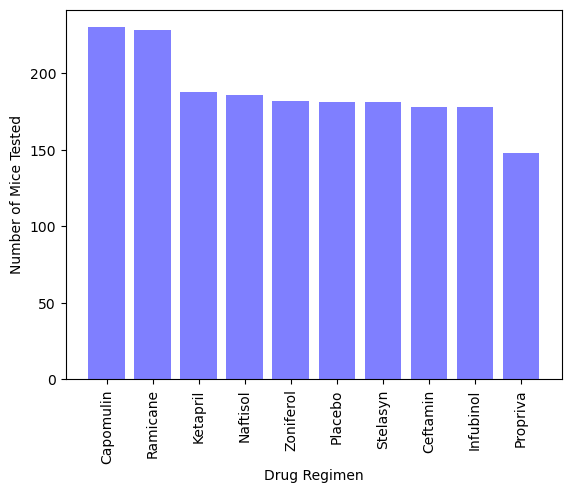

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Get the timepoints (but this returns a series, so convert to an array)
timepoints = drug_and_timepoints["Timepoint"].array

#Return each drug regiment in an array
drug_regimen = drug_and_timepoints.index.array

#Define the x-axis points
x_axis = np.arange(len(drug_regimen))

#Plot the bar chart
plt.bar(x_axis, timepoints, color='blue', alpha=0.5, align="center")

#input the tick locations, and rotate the text for easier reading
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen)
plt.xticks(rotation=90)

#Change axes and chart titles

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show


<AxesSubplot:title={'center':'Sex of Mice'}, ylabel='Mouse ID'>

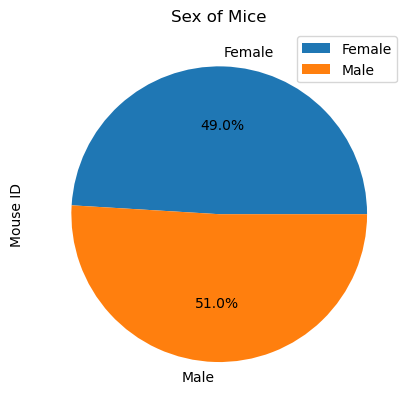

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#count the number of Male and Female mice 
mouse_sex_counts = clean_results_complete.groupby(["Sex"]).count()

#plot the results
labels = ["Female", "Male"]
mouse_sex_counts.plot(kind = "pie", y = "Mouse ID", labels=labels, autopct="%1.1f%%" ,title = "Sex of Mice",)

Text(0.5, 1.0, 'Sex of Mice')

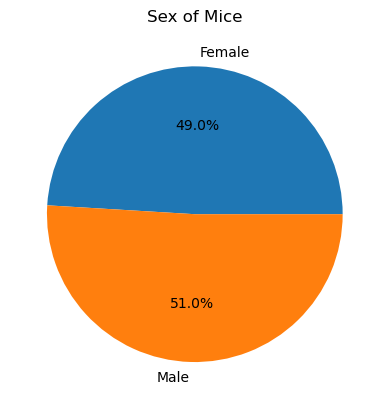

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Generate an array that contains the number of female and the number of male mice
mouse_sex_counts_array = mouse_sex_counts["Mouse ID"].values
labels = ["Female", "Male"]
plt.pie(mouse_sex_counts_array,  labels=labels, autopct="%1.1f%%")
plt.title("Sex of Mice")

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_by_mouse = clean_results_complete.groupby(["Mouse ID"]).max()["Timepoint"].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_merged = pd.merge(last_timepoint_by_mouse, clean_results_complete, on=["Mouse ID", "Timepoint"])

#Filter for the four treatment regiments in question
last_timepoint_filtered = last_timepoint_merged.loc[(last_timepoint_merged["Drug Regimen"] == "Capomulin") | 
                                                               (last_timepoint_merged["Drug Regimen"] == "Ramicane") |
                                                               (last_timepoint_merged["Drug Regimen"] == "Infubinol") |
                                                               (last_timepoint_merged["Drug Regimen"] == "Ceftamin")]
last_timepoint_filtered

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = list(last_timepoint_filtered["Drug Regimen"].unique())

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    treatments = last_timepoint_filtered.loc[last_timepoint_filtered["Drug Regimen"] == treatment]
    
    # Calculate the IQR
    quartiles = treatments["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #quantitatively determine if there are any potential outliers. 
    outliers_df = treatments.loc[(treatments["Tumor Volume (mm3)"] < lower_bound) | (treatments["Tumor Volume (mm3)"] > upper_bound)]
    outliers_tum_vol = outliers_df["Tumor Volume (mm3)"]
    
    #print the potential outliers for each treatment
    print(f"{treatment}'s potential outliers: {outliers_tum_vol}") 


Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


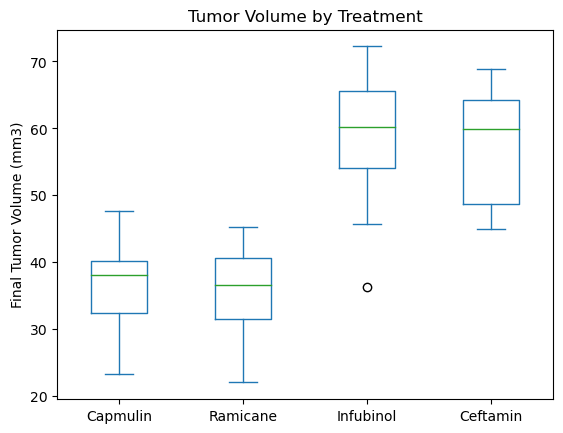

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#Create a filtered dataframe for each drug regimen, and then save the results for the Tumor Volume in each case
capomulin_df = last_timepoint_filtered.loc[last_timepoint_filtered["Drug Regimen"] == "Capomulin"]
capomulin_tum_vol = capomulin_df["Tumor Volume (mm3)"]

ramicane_df = last_timepoint_filtered.loc[last_timepoint_filtered["Drug Regimen"] == "Ramicane"]
ramicane_tum_vol = ramicane_df["Tumor Volume (mm3)"]

infubinol_df = last_timepoint_filtered.loc[last_timepoint_filtered["Drug Regimen"] == "Infubinol"]
infubinol_tum_vol = infubinol_df["Tumor Volume (mm3)"]

ceftamin_df = last_timepoint_filtered.loc[last_timepoint_filtered["Drug Regimen"] == "Ceftamin"]
ceftamin_tum_vol = ceftamin_df["Tumor Volume (mm3)"]

#Store all these columns into a combined dataframe to plot
box_plot_data = pd.DataFrame({"Box1": capomulin_tum_vol,
                             "Box2": ramicane_tum_vol,
                             "Box3": infubinol_tum_vol,
                             "Box4": ceftamin_tum_vol})



ax = box_plot_data[["Box1", "Box2", "Box3", "Box4"]].plot(kind = "box",
                                                          title = "Tumor Volume by Treatment",
                                                         ylabel = "Final Tumor Volume (mm3)",
                                                         )
plt.xticks([1,2,3,4], ["Capmulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


## Line and Scatter Plots

229     45.000000
251     45.851193
535     46.759074
873     47.488599
973     48.070452
1136    44.006257
1402    44.708055
1487    40.207288
1710    40.770813
1758    41.483008
Name: Tumor Volume (mm3), dtype: float64

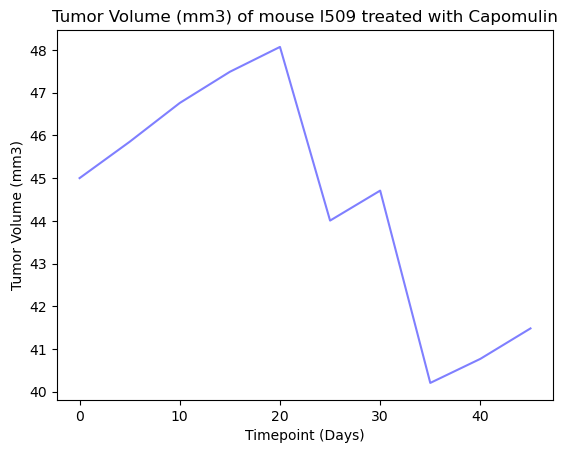

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#input a mouse number to search for
mouse = "l509"
#filter the dataframe only for that mouse
mouse_df = clean_results_complete.loc[clean_results_complete["Mouse ID"] == mouse]

#store the timepoints
timepoints_mouse = mouse_df["Timepoint"]
#store all the tumor volumes
tumorvol_mouse = mouse_df["Tumor Volume (mm3)"]

#plot!
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume (mm3) of mouse {mouse} treated with Capomulin")
plt.plot(timepoints_mouse, tumorvol_mouse, color = "blue", alpha = 0.5)
tumorvol_mouse

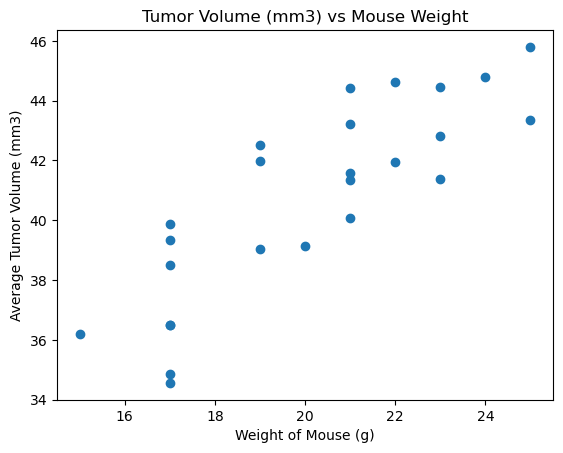

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Filter the original cleaned dataframe to only show capomulin under drug regumen
capomulin_full_df = clean_results_complete.loc[clean_results_complete["Drug Regimen"] == "Capomulin"]

#Calculate the mean of the tumorvolume column, and since the weight doesn't vary from timepoint to timepoint the mean
#of that will just be the weight of each mouse stored in the same dataframe
capomulin_av_tum_vol_and_weight = capomulin_full_df.groupby(["Mouse ID"])[["Tumor Volume (mm3)", "Weight (g)"]].mean()

#Isolate each column to plot
capomulin_av_tum_vol = capomulin_av_tum_vol_and_weight["Tumor Volume (mm3)"]
capomulin_mouse_weight = capomulin_av_tum_vol_and_weight["Weight (g)"]

#Plot
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"Tumor Volume (mm3) vs Mouse Weight")

plt.scatter(capomulin_mouse_weight,capomulin_av_tum_vol)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


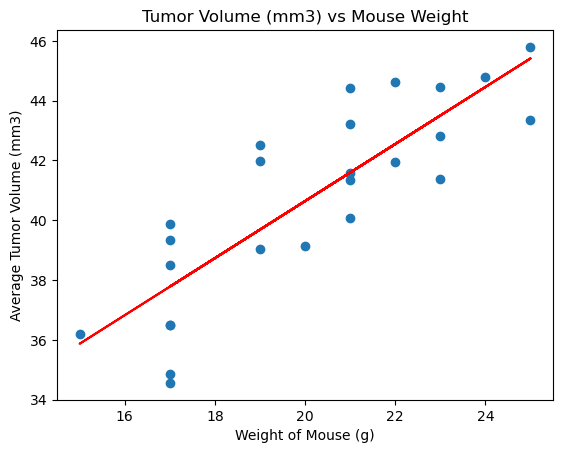

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_mouse_weight, capomulin_av_tum_vol)
regress_values = capomulin_mouse_weight * slope + intercept

#Plot the scatter plot again
plt.scatter(capomulin_mouse_weight,capomulin_av_tum_vol)
#This time, include the line
plt.plot(capomulin_mouse_weight,regress_values,"r-")
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"Tumor Volume (mm3) vs Mouse Weight")

#print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()